# Equipartition theorem
The equipartition theorem states that each particle should have $\frac{1}{2} k_B T$ of energy on average for each degree of freedom it has. We start a simulation where each disc starts with the same linear speed (but in random directions) and zero angular velocity. We then see if after sufficient time each disc ends up with $\frac{1}{2} k_B T$ of energy on average for each degree of freedom.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import billiards as bl

In [2]:
# Setup the simulation
L = 400.0  # Simulation width
bottom_left = np.array([-L/2, -L/2])
top_right = np.array([L/2, L/2])

sim = bl.PySim(bottom_left, top_right, 49, 49)
sim.e_t = 1.0  # Allow discs to rotate

# Number, speed, masses, radii of discs
N_discs = 10_000
v = 1.0
m = 1.0
R = 1.0

# Compute the expected temprature
kB_T = m*v**2 / 3.0

sim.add_random_discs(bottom_left, top_right, N_discs, m, R, v=v, pos_allocation='grid')

In [3]:
sim.advance(75_000, 50.0, True)

Now we can see how the mean kinetic energy of each degree of freedom varies over time.

In [4]:
dt = 0.1

replay_gen = sim.replay_by_time(dt)

iterations = 0
KE_v_x, KE_v_y, KE_w = [], [], []

for state in replay_gen:
    iterations += 1
    
    m = state['m']
    I = state['I']
    
    cur_v_x, cur_v_y = state['v'].T
    cur_w = state['w']
    
    KE_v_x.append(np.mean(m*cur_v_x**2)/2)
    KE_v_y.append(np.mean(m*cur_v_y**2)/2)
    KE_w.append(np.mean(I*cur_w**2)/2)

KE_v_x = np.array(KE_v_x)
KE_v_y = np.array(KE_v_y)
KE_w = np.array(KE_w)

In [5]:
t = np.linspace(0.0, (iterations-1)*dt, iterations)

Now we can plot the result relative to the expected $\frac{1}{2}k_B T$ (dashed line) and see the equipartition theorem holds.

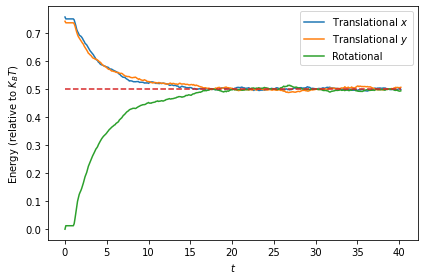

In [6]:
plt.plot(t, KE_v_x / kB_T, label="Translational $x$")
plt.plot(t, KE_v_y / kB_T, label="Translational $y$")
plt.plot(t, KE_w / kB_T, label="Rotational")

# Plot the line corresponding to kB_T
plt.plot([t[0], t[-1]], [0.5, 0.5], '--')


plt.xlabel("$t$")
plt.ylabel("Energy (relative to $K_B T$)")

plt.legend()

plt.tight_layout()
plt.show()